In [1]:
import pandas as pd
import numpy as np
from numpy import linalg as la
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from matplotlib import*
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
#raw_data
df = pd.read_csv("kc_house_data.csv")
df.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


In [3]:
#pre-processing and cleaning
#drop id and zipcode
df=df.drop(['id','date','zipcode','yr_renovated','view','waterfront'],1)
df.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0,1955,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400,1951,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,3,6,770,0,1933,47.7379,-122.233,2720,8062


In [4]:
df.shape

(21613, 15)

In [5]:
X=df.drop(['price'],1)
Y=df[['price']]

In [6]:
# df_n=(df-df.min())/((df.max())-(df.min()))
Xs=(X-X.mean())/(X.std())
Xs.head(3)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15
0,-0.398728,-1.447430,-0.979812,-0.228316,-0.915406,-0.629172,-0.558823,-0.734691,-0.658666,-0.544885,-0.352564,-0.306072,-0.943333,-0.260709
1,-0.398728,0.175603,0.533622,-0.189881,0.936484,-0.629172,-0.558823,0.460830,0.245136,-0.681063,1.161541,-0.746324,-0.432676,-0.187863
2,-1.473925,-1.447430,-1.426221,-0.123296,-0.915406,-0.629172,-1.409554,-1.229805,-0.658666,-1.293862,1.283507,-0.135652,1.070115,-0.172371


In [7]:
Xs_cov=Xs.cov()

In [8]:
Xs_cov.head(3)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15
bedrooms,1.000000,0.515884,0.576671,0.031703,0.175429,0.028472,0.356967,0.477600,0.303093,0.154178,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.515884,1.000000,0.754665,0.087740,0.500653,-0.124982,0.664983,0.685342,0.283770,0.506019,0.024573,0.223042,0.568634,0.087175
sqft_living,0.576671,0.754665,1.000000,0.172826,0.353949,-0.058753,0.762704,0.876597,0.435043,0.318049,0.052529,0.240223,0.756420,0.183286


In [9]:
eigen_value,eigen_vector=la.eig(Xs_cov)
print(eigen_value[:])

[ 5.05098374e+00  1.87016338e+00  1.78387613e+00  1.06173180e+00
  8.46223892e-01  7.91520746e-01  6.43049873e-01  6.23275717e-01
  3.57342162e-01  1.97983067e-01  2.85894277e-01  2.61373183e-01
  2.26582035e-01 -3.47668819e-16]


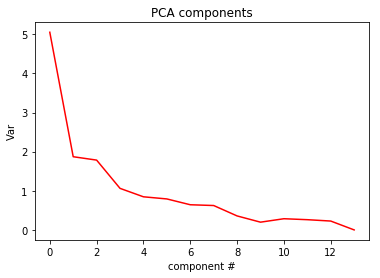

In [10]:
index = np.arange(len(eigen_value))
plt.plot(index, eigen_value, color='r')
plt.xlabel('component #')
plt.ylabel('Var')
plt.title('PCA components')
plt.show()

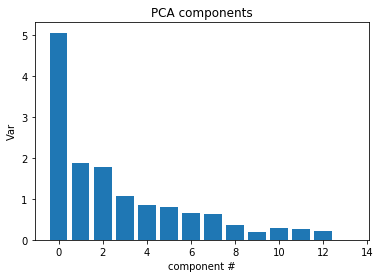

In [11]:
index = np.arange(len(eigen_value))
plt.bar(index, eigen_value)
plt.xlabel('component #')
plt.ylabel('Var')
plt.title('PCA components')
plt.show()

A good number of PCA would be 6. 

In [12]:
X_train, X_test, y_train, y_test = train_test_split(Xs, Y, test_size=0.2, random_state=0) 

In [13]:
pca=PCA(n_components=6)
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)

In [14]:
#KNN model

In [15]:
accuracy_values=[]
neighbor_count=[3,5,10,12,15,20,25,30,35,40,45,50]
for i in neighbor_count:
    neigh = KNeighborsRegressor(n_neighbors = i, metric = 'euclidean')
    neigh.fit(X_train,y_train)
    PRED=neigh.predict(X_test)
    ten_score=neigh.score(X_test,y_test)
    accuracy_values.append(ten_score)

In [16]:
print accuracy_values

[0.7479055812734365, 0.7617455364358612, 0.7739490041290873, 0.7711454733634773, 0.76807469746629, 0.757863388380646, 0.7533808823565806, 0.7543016068451697, 0.7485568777792191, 0.744254971983161, 0.7413575045397784, 0.7409198207831815]


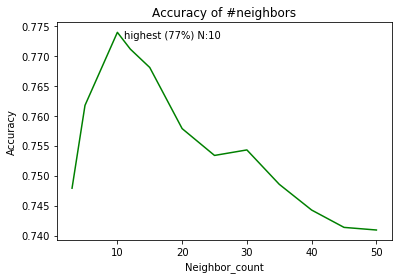

In [17]:
plt.plot(neighbor_count,accuracy_values,color='g')
plt.xlabel('Neighbor_count')
plt.ylabel('Accuracy')
plt.title('Accuracy of #neighbors')
plt.text(11,0.773, r'highest (77%) N:10')
plt.show()


 From the plot its cleara to say an optimal number of nearest neighbours would be 10.

In [18]:
#training the final model
neigh = KNeighborsRegressor(n_neighbors = 10, metric = 'euclidean')
neigh.fit(X,Y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='euclidean',
          metric_params=None, n_jobs=1, n_neighbors=10, p=2,
          weights='uniform')